# Concerning Daylight Savings Time

### _Investigation by Alex Dempsey on March 8th, 2015_

A growing number of people are beginning to acknowledge the (perhaps unintended) magnificence of Daylight Savings Time. It wasn't always this way. For years people complained about the lost hour of sleep when time springs forward, and cheered the extra hour gained from falling back.

In the 21st Century, however, we're seeing the dawn of a more vigorous ethics. Boldness is virtue and "falling back" is disgrace. We do not seek one extra hour before the great good night if it means a lifetime of pale shadows. We want sun. Sun in our faces, lighting up the Good Earth, casting bright lines of true and false. Sunliness is godliness, and we urgently seek more of it.

Moreover, the popularity of Daylight Savings Time grows because this age of smart phones is an age of Awareness, not an age of Instincts.

#### Let Gaius Helen Mohiam explain:

In [1]:
from __future__ import print_function, division
from IPython.display import HTML

In [2]:
HTML('''<iframe width="420" height="315" src="https://www.youtube.com/embed/yIDtN8CDQmk?start=125&end=140" frameborder="0" allowfullscreen></iframe>''')

### Our Understanding Can Save Us

What is the truth that enables us to keep our hands in the box of losing-an-hour-of-sleep-once pain? Lets reveal the savings of Daylight Savings Time. **The best sun times are when we are not work. So lets see how much sun time we have before and after work!**

This page you're looking at is a published copy of an IPython Notebook. Before publishing, an IPython Notebook is an interactive computing environment that lets you mix code with prose. You can compute and display any kind of object that can be viewed in a browser. Also, it's free. Here's a link where you can download a copy for your computer (the Continuum folks make friendly installers for IPython, IPython itself is open source): https://store.continuum.io/cshop/anaconda/

First, lets import some already written code to make our job easier:

In [3]:
%matplotlib inline

from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import ephem
from delorean import Delorean
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
sns.set_context("talk")

### Where are we?

To calculate sunrise and sunset times, the excellent PyEphemeral library needs to know where on Earth you are.

I'll create an observer "sf" in San Francisco:

In [5]:
sf = ephem.city("San Francisco")

For there to be a sunrise and sunset we need a star.

Here, let's make one:

In [6]:
sun = ephem.Sun()

The final thing we need to make an astronomical observation is a time. I live on US/Pacific time, but PyEphemeral does all of its calculations in Universal Time. I'll use the the Delorean library to do timezone shifts (get it?), first I'll create a time object representing noon today:

In [7]:
from datetime import datetime
from delorean import Delorean

noon_today = Delorean(datetime(2015, 3, 8, 12), "US/Pacific")
print("Noon today is...", noon_today, 'in US/Pacific time.')

Noon today is... Delorean(datetime=2015-03-08 12:00:00-07:00, timezone=US/Pacific) in US/Pacific time.


...now I'll convert that time to Universal Time:

In [8]:
noon_today.shift("UTC")
print("Noon today is", noon_today.datetime, "in Universal Time.")

Noon today is 2015-03-08 19:00:00+00:00 in Universal Time.


Now that we have the Sun, an observer, and the time we only need to tell PyEphemeral what observation we want to make.

PyEphemeral has two methods we'll use for this: previous_rising() and next_setting()

Here they are in action (with some extra code to do timezone conversions):

In [9]:
print("The sun rose at", ephem.localtime(sf.previous_rising(sun, noon_today.datetime)))

The sun rose at 2015-03-08 07:31:05.000006


In [10]:
print("The sun will set at", ephem.localtime(sf.next_setting(sun, noon_today.datetime)))

The sun will set at 2015-03-08 19:10:20.000006


That's one day. Now I want to do the same thing for the whole year. I chose noon as the time because I'm confident the sun will never rise later than noon in SF, and it will never set before noon. That way previous_rising and next_setting will give me results for the same day that I'm asking from.

So, I'll make a list of every day of 2015 at noon:

In [11]:
noons = pd.date_range(start='2015-01-01 12:00:00', end='2015-12-31 12:00:00', tz="US/Pacific")

...then, make a list of sunrises and sunsets for each day of the year:

In [12]:
rises, sets = [], []
for day in noons:
    uday = Delorean(day).shift("UTC").datetime
    rises.append(Delorean(ephem.localtime(sf.previous_rising(sun, uday)), 'US/Pacific').datetime)
    sets.append(Delorean(ephem.localtime(sf.next_setting(sun, uday)), 'US/Pacific').datetime)

Now I'll bundle it all together into a single table:

In [13]:
df = pd.DataFrame({'rises': rises}, index=pd.date_range(start='2015-01-01', end='2015-12-31', tz="US/Pacific"))
df['sets'] = sets

To figure out how much sunlight I'll see outside of work I'll add a column to my table listing the time I wake up, go to sleep, clock in, and clock out for each day of the year. Lets assume I work every day of the year, wake up at 8am, clock in at 10am, clock out at 6pm, and go to bed at midnight the next day:

In [14]:
df['wakeups'] = pd.date_range(start='2015-01-01 08:00:00', end='2015-12-31 08:00:00', tz="US/Pacific")
df['sleeps'] = pd.date_range(start='2015-01-02 00:00:00', end='2016-01-01 00:00:00', tz="US/Pacific")
df['clock_in'] = pd.date_range(start='2015-01-01 10:00:00', end='2015-12-31 10:00:00', tz="US/Pacific")
df['clock_out'] = pd.date_range(start='2015-01-01 18:00:00', end='2015-12-31 18:00:00', tz="US/Pacific")

So how much sunlight did I get after work yesterday? I can pick out a single date (today) and subtract the clock_out time from the sets time:

In [15]:
x = df.ix['2015-03-07']

# Sunlight after work
(x.sets - x.clock_out).total_seconds()

562.000005

...that's 562 seconds of sunlight. Lame.

In [16]:
# Sunlight before work
(x.clock_in - x.rises).total_seconds()

12447.999995

In [17]:
# Total sunlight after work 2015
(df.sets - df.clock_out).sum()

Timedelta('13 days 21:54:10.001095')

In [18]:
# Average sunlight after work
(df.sets - df.clock_out).sum() / len(df)

Timedelta('0 days 00:54:53.287674')

In [19]:
# Total sunlight before work 2015
(df.clock_in - df.rises).sum()

Timedelta('50 days 00:24:11.998905')

In [20]:
# How much sunlight do I actually see before work in 2015?
(df.clock_in - df.wakeups).sum()

Timedelta('30 days 10:00:00')

In [21]:
df['after_work_sun'] = (df.sets - df.clock_out) / np.timedelta64(1,'m')

In [22]:
def rise_and_shine(row, rise):
    if row['wakeups'] > row[rise]:
        return row['clock_in'] - row['wakeups']
    else:
        return row['clock_in'] - row[rise]

In [23]:
df['before_work_sun'] = df.apply(rise_and_shine, args=('rises',), axis=1) / np.timedelta64(1,'m')

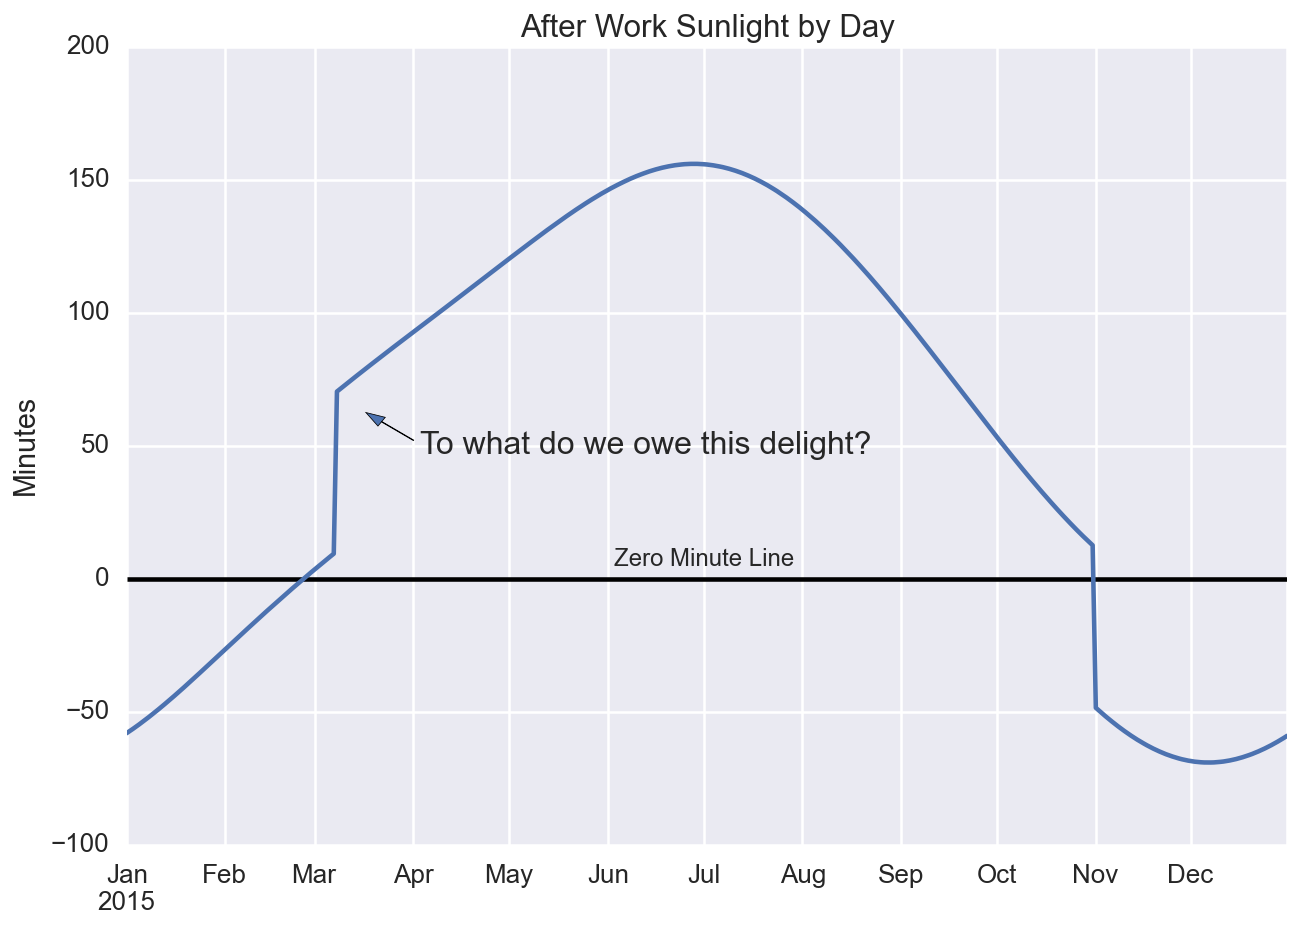

In [24]:
df.after_work_sun.plot()
plt.hlines(0, pd.Timestamp('2015-01-01'), pd.Timestamp('2015-12-31'))
plt.title('After Work Sunlight by Day')
plt.ylabel('Minutes')
plt.text(pd.Timestamp('2015-07-01'), 5, 'Zero Minute Line', fontsize=12, horizontalalignment='center')
plt.arrow(pd.Timestamp('2015-04-01'), 52, -10, 7, width=0.2)
plt.text(pd.Timestamp('2015-04-03'), 47, 'To what do we owe this delight?', fontsize=16)

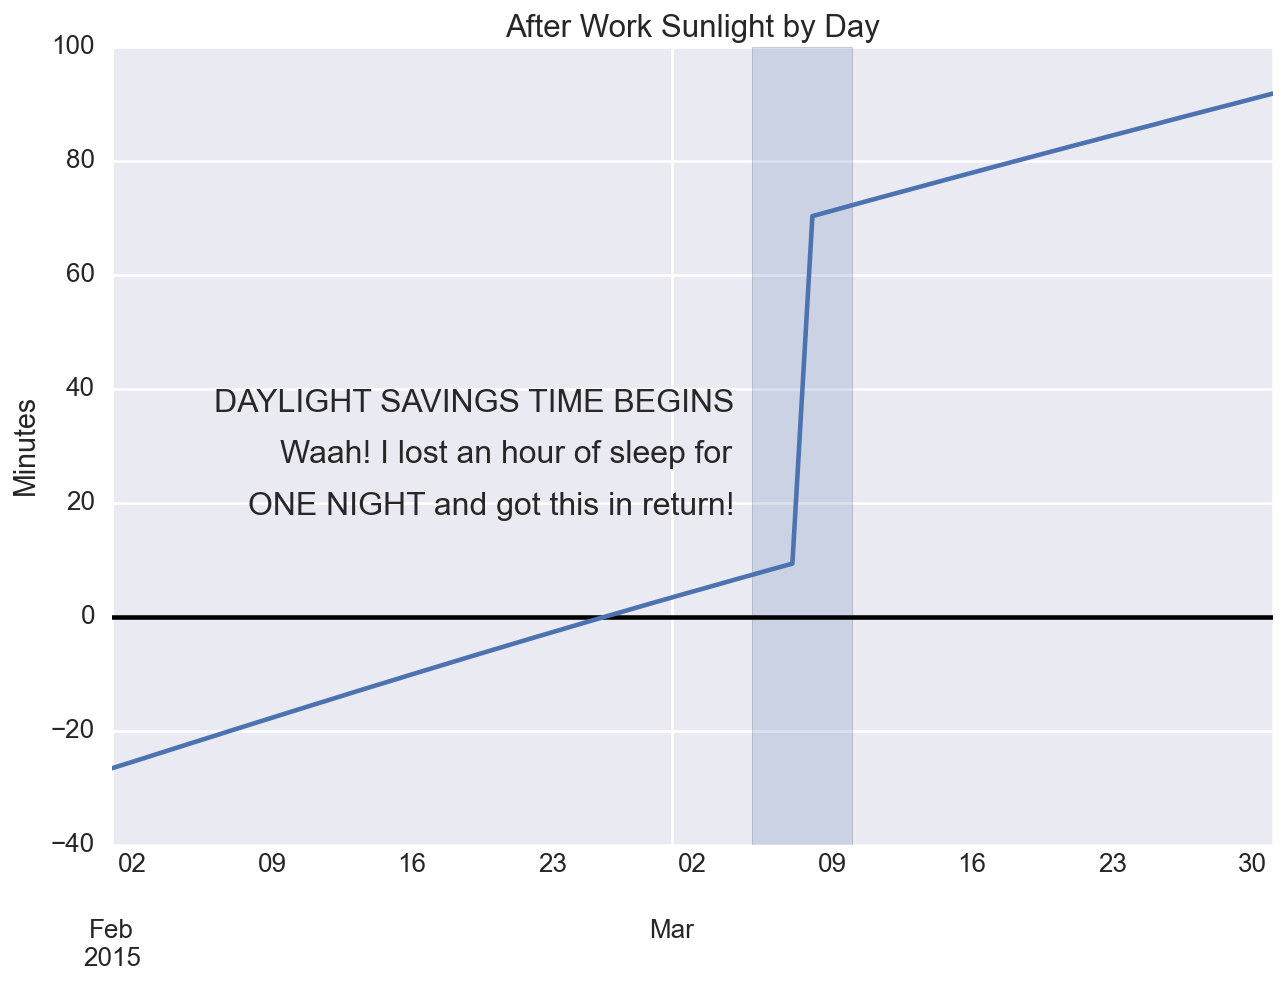

In [25]:
df['2015-02':'2015-03'].after_work_sun.plot()
plt.hlines(0, pd.Timestamp('2015-01-01'), pd.Timestamp('2015-03-31'))
plt.title('After Work Sunlight by Day')
plt.ylabel('Minutes')
plt.text(pd.Timestamp('2015-03-04'), 36, "DAYLIGHT SAVINGS TIME BEGINS", fontsize=16, horizontalalignment='right')
plt.text(pd.Timestamp('2015-03-04'), 27, "Waah! I lost an hour of sleep for", fontsize=16, horizontalalignment='right')
plt.text(pd.Timestamp('2015-03-04'), 18, "ONE NIGHT and got this in return!", fontsize=16, horizontalalignment='right')
plt.axvspan(pd.Timestamp('2015-03-05'), pd.Timestamp('2015-03-10'), alpha=0.2)

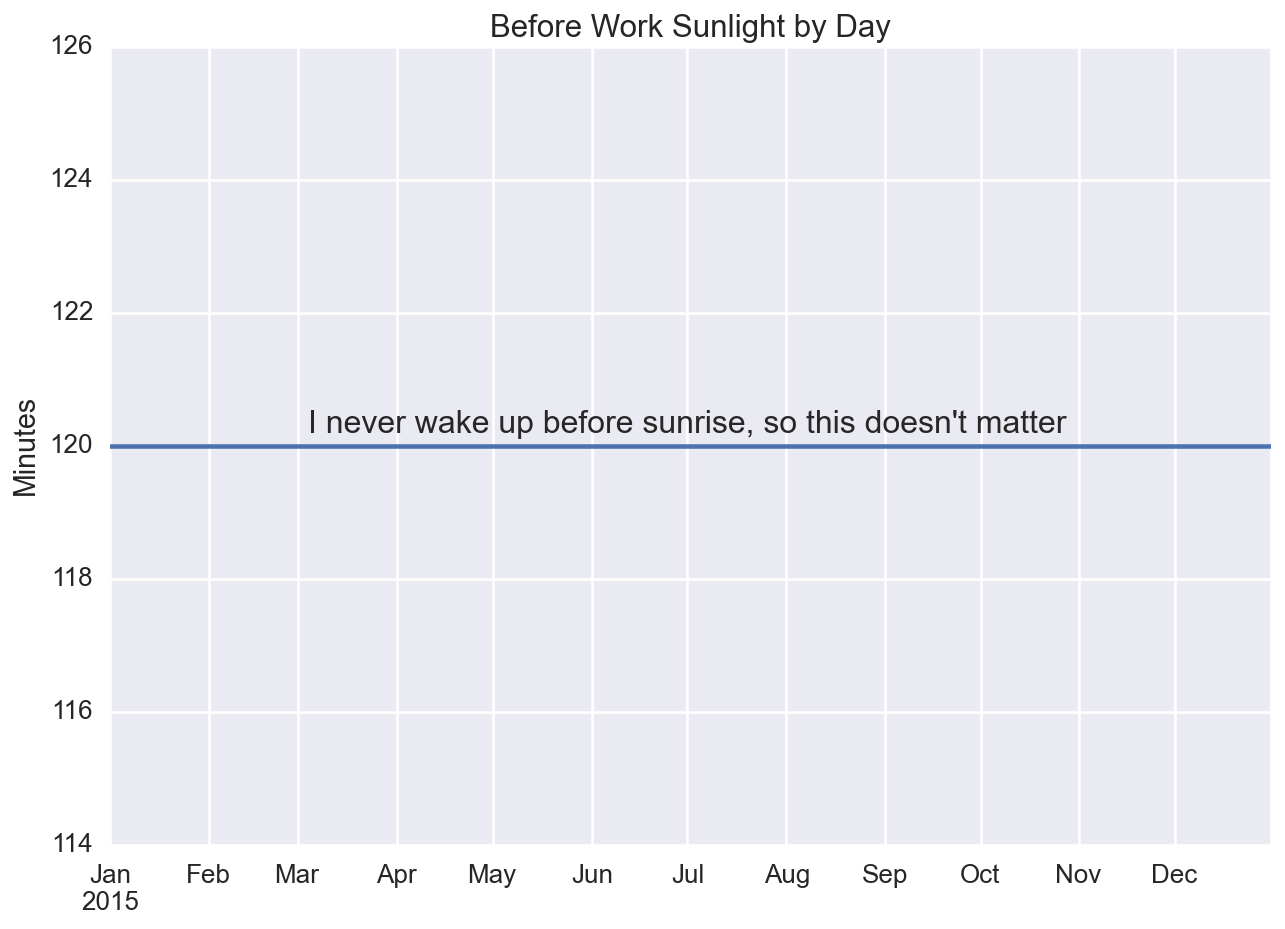

In [26]:
df.before_work_sun.plot()
plt.title('Before Work Sunlight by Day')
plt.ylabel('Minutes')
plt.text(pd.Timestamp('2015-07-01'), 120.2, "I never wake up before sunrise, so this doesn't matter",
         fontsize=16,
         horizontalalignment='center')

In [27]:
df['dst_sets'] = pd.concat([df[:'2015-03-07'].sets + timedelta(hours=1), 
                            df['2015-03-08':'2015-10-31'].sets, 
                            df['2015-11-01':].sets + timedelta(hours=1)])

In [28]:
df['after_work_sun_dst'] = (df.dst_sets - df.clock_out) / np.timedelta64(1,'m')

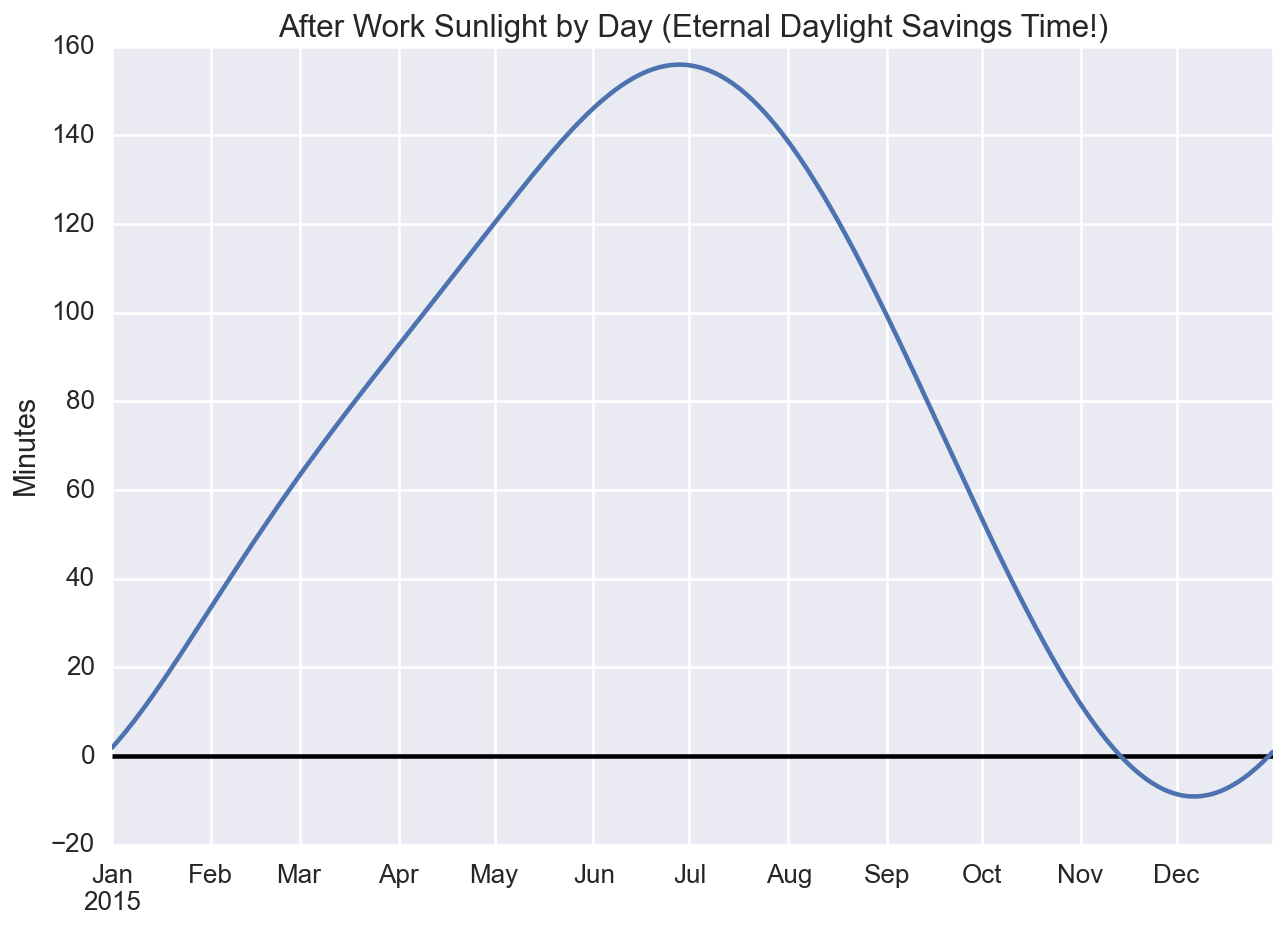

In [29]:
df.after_work_sun_dst.plot()
plt.hlines(0, pd.Timestamp('2015-01-01'), pd.Timestamp('2015-12-31'))
plt.title('After Work Sunlight by Day (Eternal Daylight Savings Time!)')
plt.ylabel('Minutes')

In [30]:
df['dst_rises'] = pd.concat([df[:'2015-03-07'].rises + timedelta(hours=1), 
                             df['2015-03-08':'2015-10-31'].rises, 
                             df['2015-11-01':].rises + timedelta(hours=1)])

df['no_dst_sets'] = pd.concat([df[:'2015-03-07'].sets, 
                               df['2015-03-08':'2015-10-31'].sets - timedelta(hours=1), 
                               df['2015-11-01':].sets])

df['no_dst_rises'] = pd.concat([df[:'2015-03-07'].rises, 
                                df['2015-03-08':'2015-10-31'].rises - timedelta(hours=1), 
                                df['2015-11-01':].rises])

In [31]:
df['before_work_sun_dst'] = df.apply(rise_and_shine, args=('dst_rises',), axis=1) / np.timedelta64(1,'m')
df['after_work_sun_no_dst'] = (df.no_dst_sets - df.clock_out) / np.timedelta64(1,'m')
df['before_work_sun_no_dst'] = df.apply(rise_and_shine, args=('no_dst_rises',), axis=1) / np.timedelta64(1,'m')

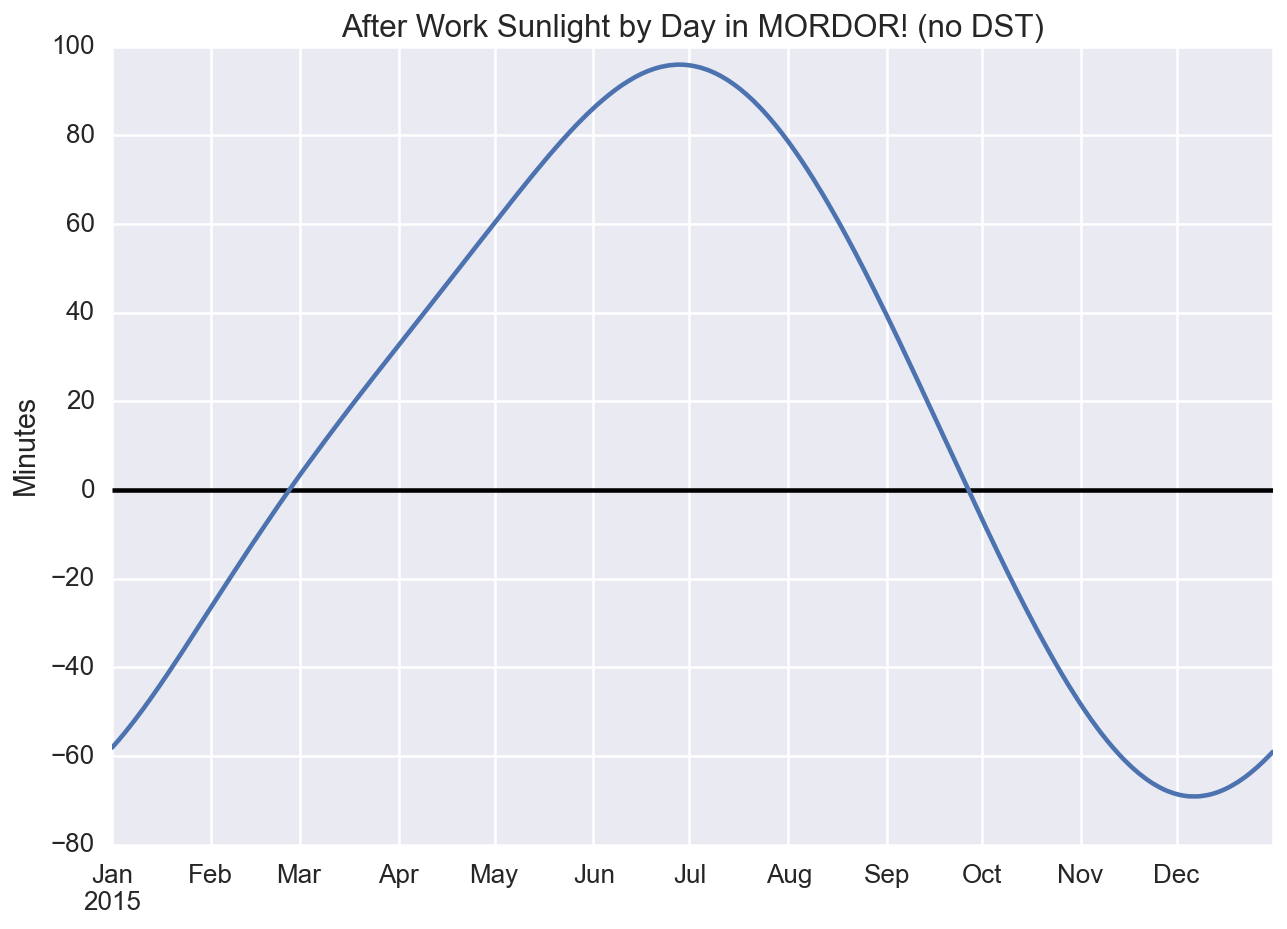

In [53]:
df.after_work_sun_no_dst.plot()
plt.hlines(0, pd.Timestamp('2015-01-01'), pd.Timestamp('2015-12-31'))
plt.title('After Work Sunlight by Day in MORDOR! (no DST)')
plt.ylabel('Minutes')

### Total Gains

An all DST year has 4.8x the after work sun as a no DST year.

Our current system has 3.5x the after work sun as a no DST year.

Moving from the current system to an all DST year will give us 38% more after work sun!

In [33]:
df.after_work_sun_dst.sum() / df.after_work_sun_no_dst.sum()

4.8059377142143322

In [34]:
df.after_work_sun.sum() / df.after_work_sun_no_dst.sum()

3.48167993420003

In [35]:
df.after_work_sun_dst.sum() / df.after_work_sun.sum()

1.3803502346687047

(0, 140)

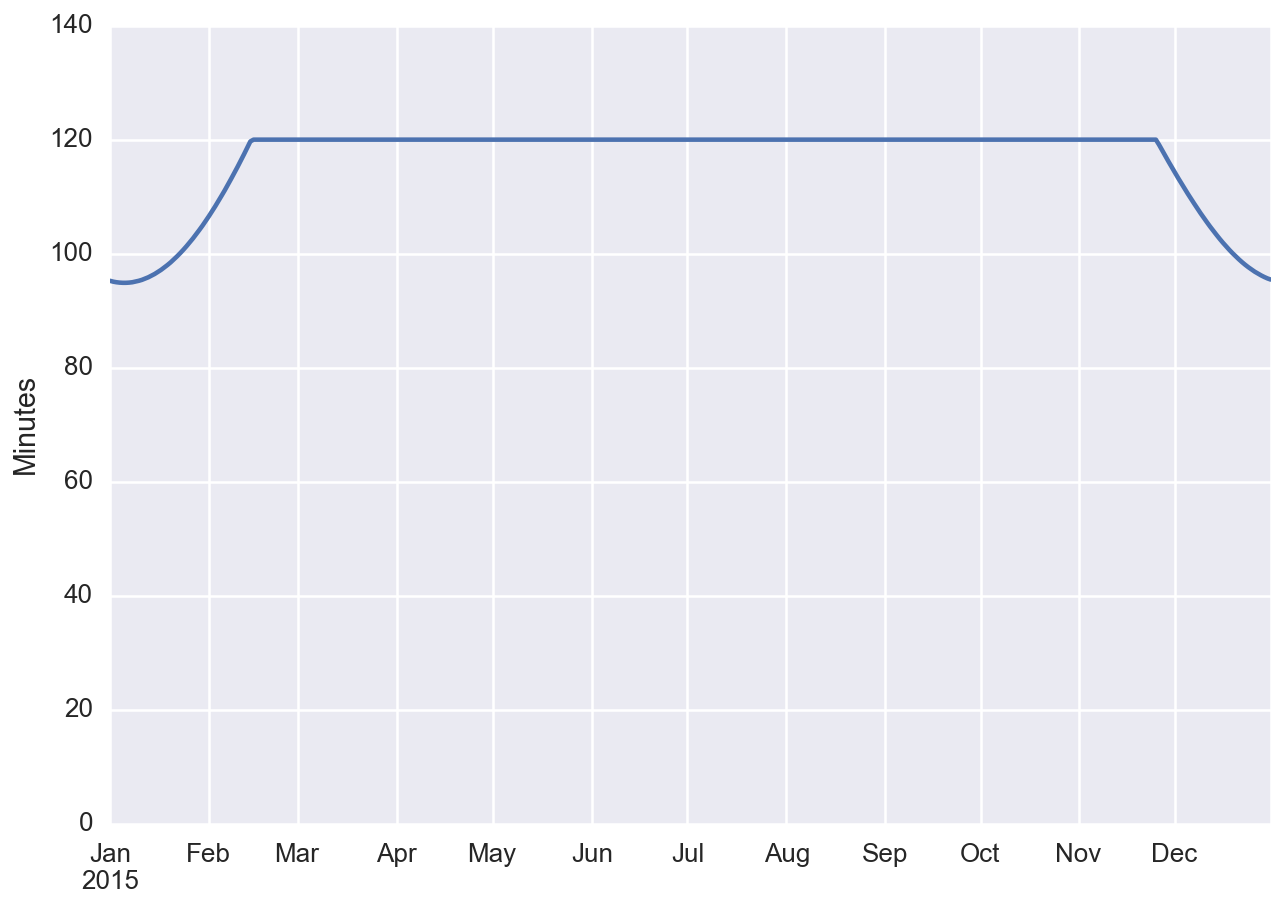

In [36]:
df.before_work_sun_dst.plot()
# plt.hlines(0, pd.Timestamp('2015-01-01'), pd.Timestamp('2015-12-31'))
# plt.title('After Work Sunlight by Day (Eternal Daylight Savings Time!)')
plt.ylabel('Minutes')
plt.ylim(0, 140)

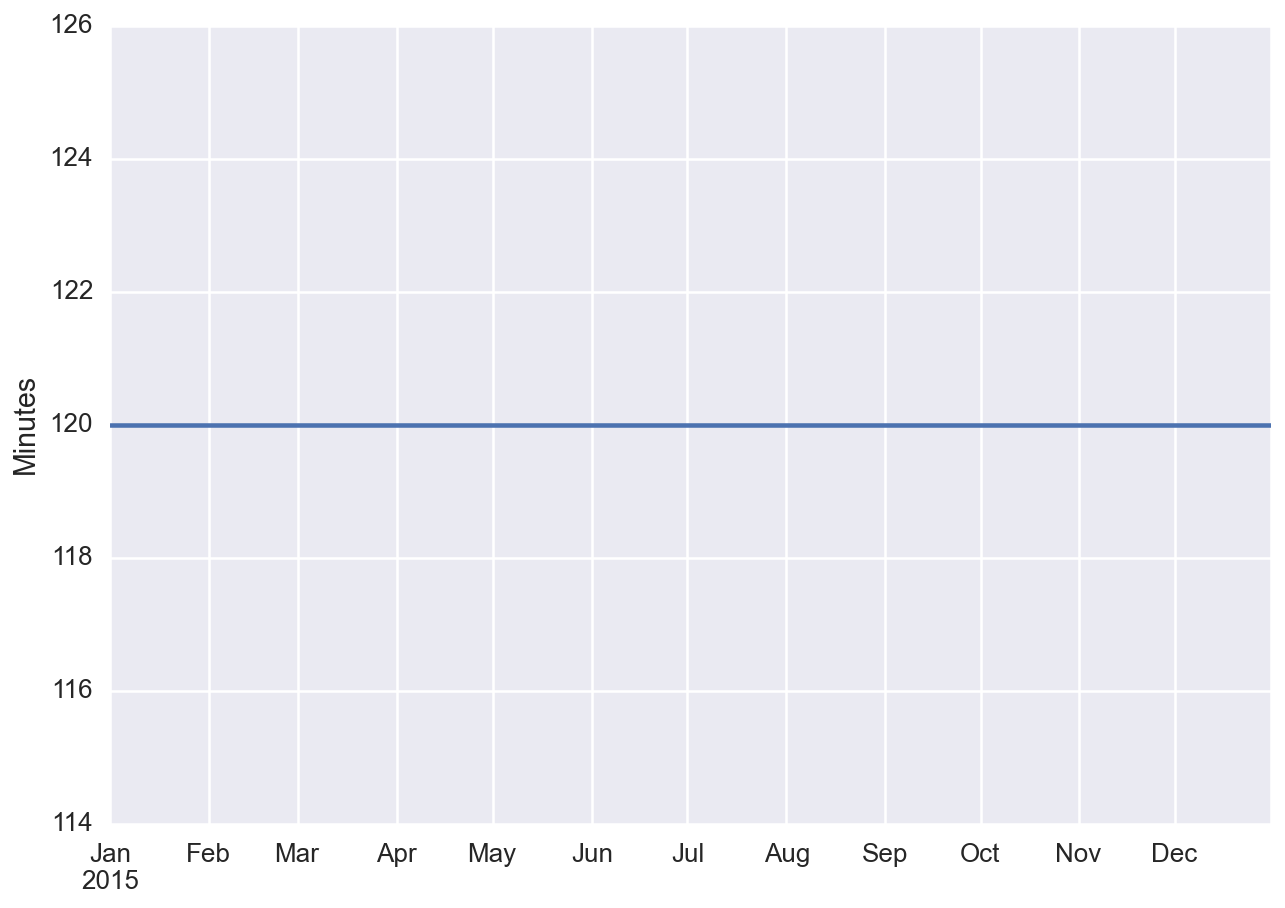

In [37]:
df.before_work_sun_no_dst.plot()
# plt.hlines(0, pd.Timestamp('2015-01-01'), pd.Timestamp('2015-12-31'))
# plt.title('After Work Sunlight by Day (Eternal Daylight Savings Time!)')
plt.ylabel('Minutes')

In [38]:
df.before_work_sun_dst.sum() / df.before_work_sun.sum()

0.96982420081963472

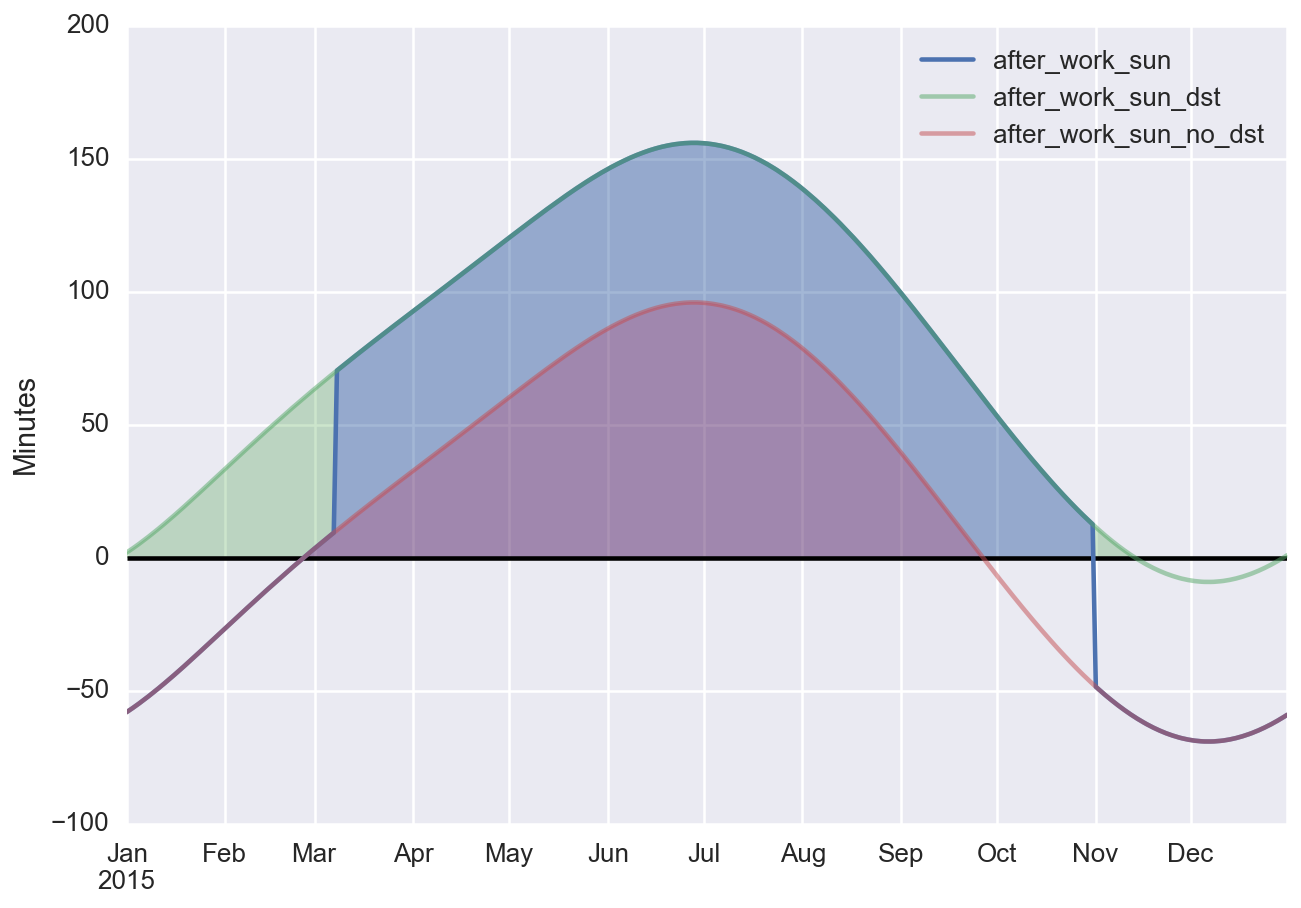

In [39]:
df.after_work_sun.plot()
df.after_work_sun_dst.plot(alpha=0.5)
df.after_work_sun_no_dst.plot(alpha=0.5)
plt.fill_between(df[df.after_work_sun_dst > 0].index, df[df.after_work_sun_dst > 0].after_work_sun_dst, 0, color='g', alpha=0.2)
plt.fill_between(df[df.after_work_sun_no_dst > 0].index, df[df.after_work_sun_no_dst > 0].after_work_sun_no_dst, 0, color='r', alpha=0.2)
plt.fill_between(df[df.after_work_sun > 0].index, df[df.after_work_sun > 0].after_work_sun, 0, color='b', alpha=0.2)
plt.hlines(0, pd.Timestamp('2015-01-01'), pd.Timestamp('2015-12-31'))
# plt.title('After Work Sunlight by Day (Eternal Daylight Savings Time!)')
plt.ylabel('Minutes')
plt.legend()

In [40]:
z = df.ix[0, 'dst_rises']

In [41]:
z = z.time()

In [42]:
import datetime

In [43]:
def dt_to_hour(dt):
    t = dt.time()
    return (t.hour * 3600 + t.minute * 60 + t.second) / 3600

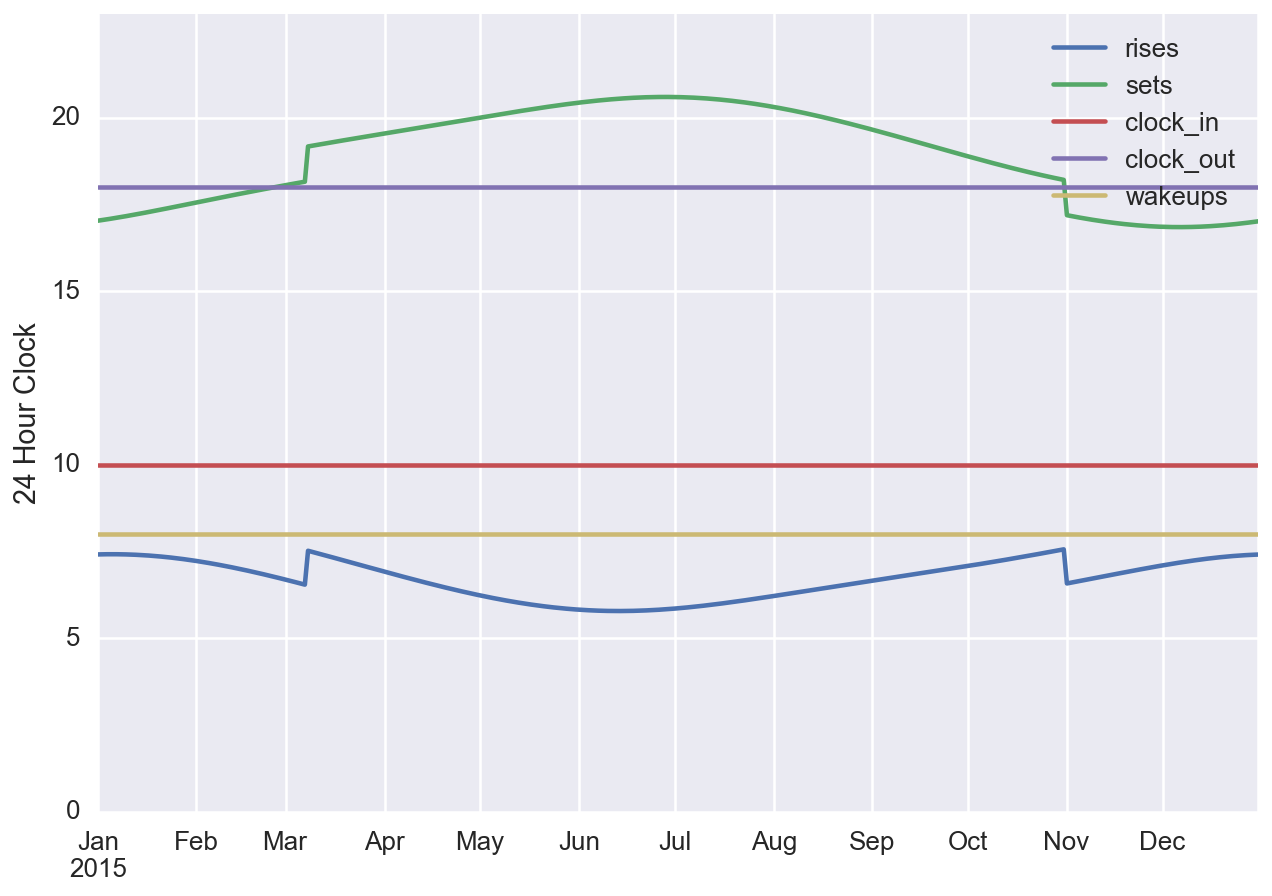

In [44]:
df.rises.apply(dt_to_hour).plot()
df.sets.apply(dt_to_hour).plot()
df.clock_in.apply(dt_to_hour).plot()
df.clock_out.apply(dt_to_hour).plot()
df.wakeups.apply(dt_to_hour).plot()
plt.ylim(0, 23)
plt.ylabel("24 Hour Clock")
plt.legend()
# loc='upper right', bbox_to_anchor=(0.5, 0.5)

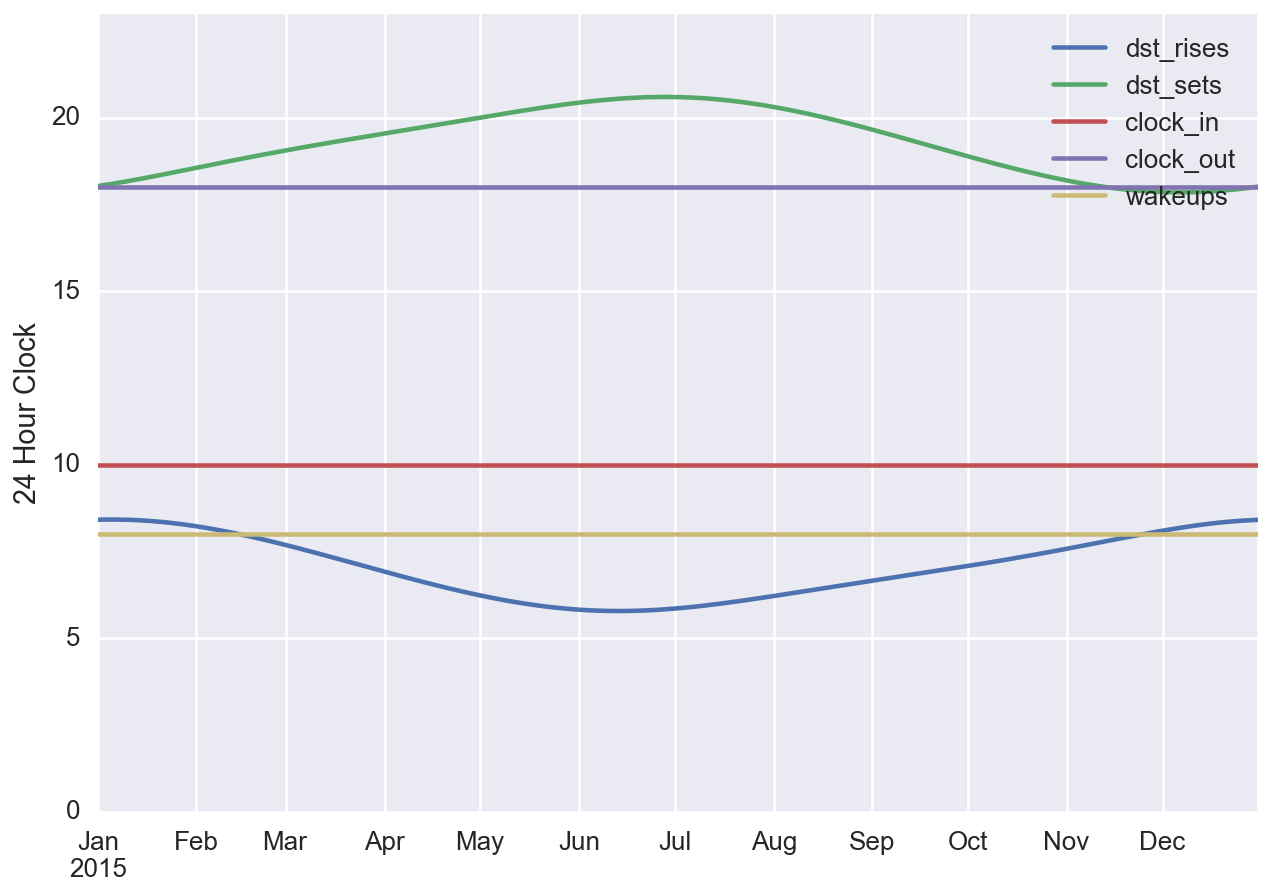

In [45]:
df.dst_rises.apply(dt_to_hour).plot()
df.dst_sets.apply(dt_to_hour).plot()
df.clock_in.apply(dt_to_hour).plot()
df.clock_out.apply(dt_to_hour).plot()
df.wakeups.apply(dt_to_hour).plot()
plt.ylim(0, 23)
plt.ylabel("24 Hour Clock")
plt.legend()

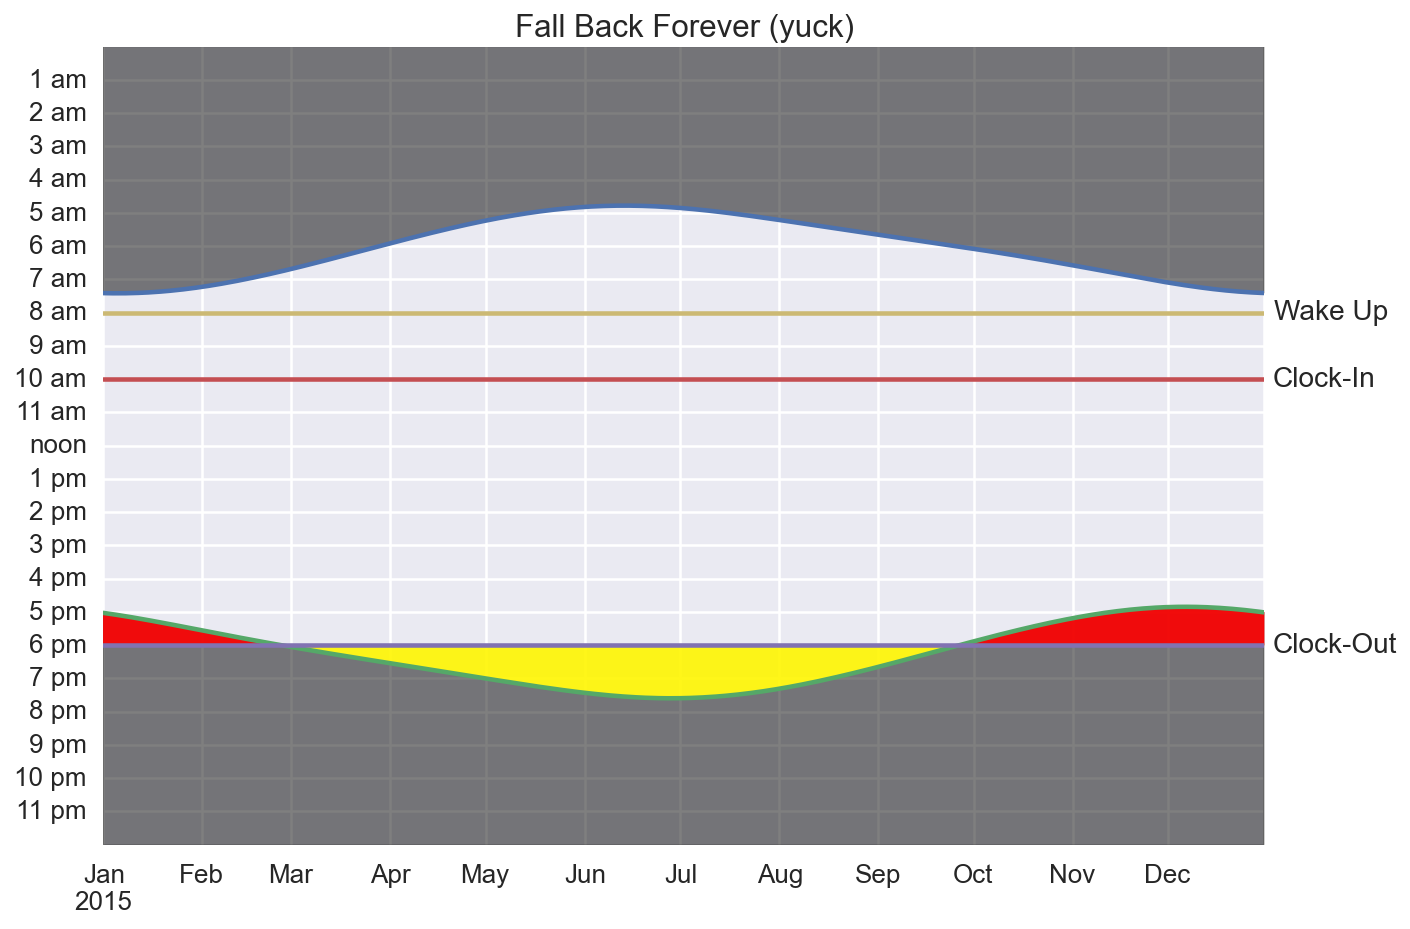

In [55]:
df.no_dst_rises.apply(dt_to_hour).plot()
df.no_dst_sets.apply(dt_to_hour).plot()
df.clock_in.apply(dt_to_hour).plot()
df.clock_out.apply(dt_to_hour).plot()
df.wakeups.apply(dt_to_hour).plot()

# plt.fill_between(df[df.after_work_sun_dst > 0].index, df[df.after_work_sun_dst > 0].after_work_sun_dst, 0, color='g', alpha=0.2)

# Shade night time dark
plt.fill_between(df.index, df.no_dst_rises.apply(dt_to_hour), 0, color='k', alpha=0.5)
plt.fill_between(df.index, df.no_dst_sets.apply(dt_to_hour), 24, color='k', alpha=0.5)

# Shade night time during work extra
plt.fill_between(df[df.no_dst_sets < df.clock_out].index, 
                 df[df.no_dst_sets < df.clock_out].no_dst_sets.apply(dt_to_hour), 
                 18, color='r', alpha=0.9)

# Shade after work sunshine
plt.fill_between(df[df.no_dst_sets > df.clock_out].index,
                 df[df.no_dst_sets > df.clock_out].clock_out.apply(dt_to_hour),
                 df[df.no_dst_sets > df.clock_out].no_dst_sets.apply(dt_to_hour),
                 color='#fff600', alpha=0.9)

plt.ylim(0, 24)
plt.gca().invert_yaxis()
plt.yticks(np.arange(1,24), ['1 am', '2 am', '3 am', '4 am', '5 am', '6 am', '7 am', '8 am', '9 am', '10 am', '11 am',
                             'noon', '1 pm', '2 pm', '3 pm', '4 pm', '5 pm', '6 pm', '7 pm', '8 pm', '9 pm', '10 pm',
                             '11 pm'])

plt.text(pd.Timestamp('2016-01-03'), 8, 'Wake Up', fontsize=14, verticalalignment='center')
plt.text(pd.Timestamp('2016-01-03'), 10, 'Clock-In', fontsize=14, verticalalignment='center')
plt.text(pd.Timestamp('2016-01-03'), 18, 'Clock-Out', fontsize=14, verticalalignment='center')

plt.title("Fall Back Forever (yuck)")

# plt.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.3))

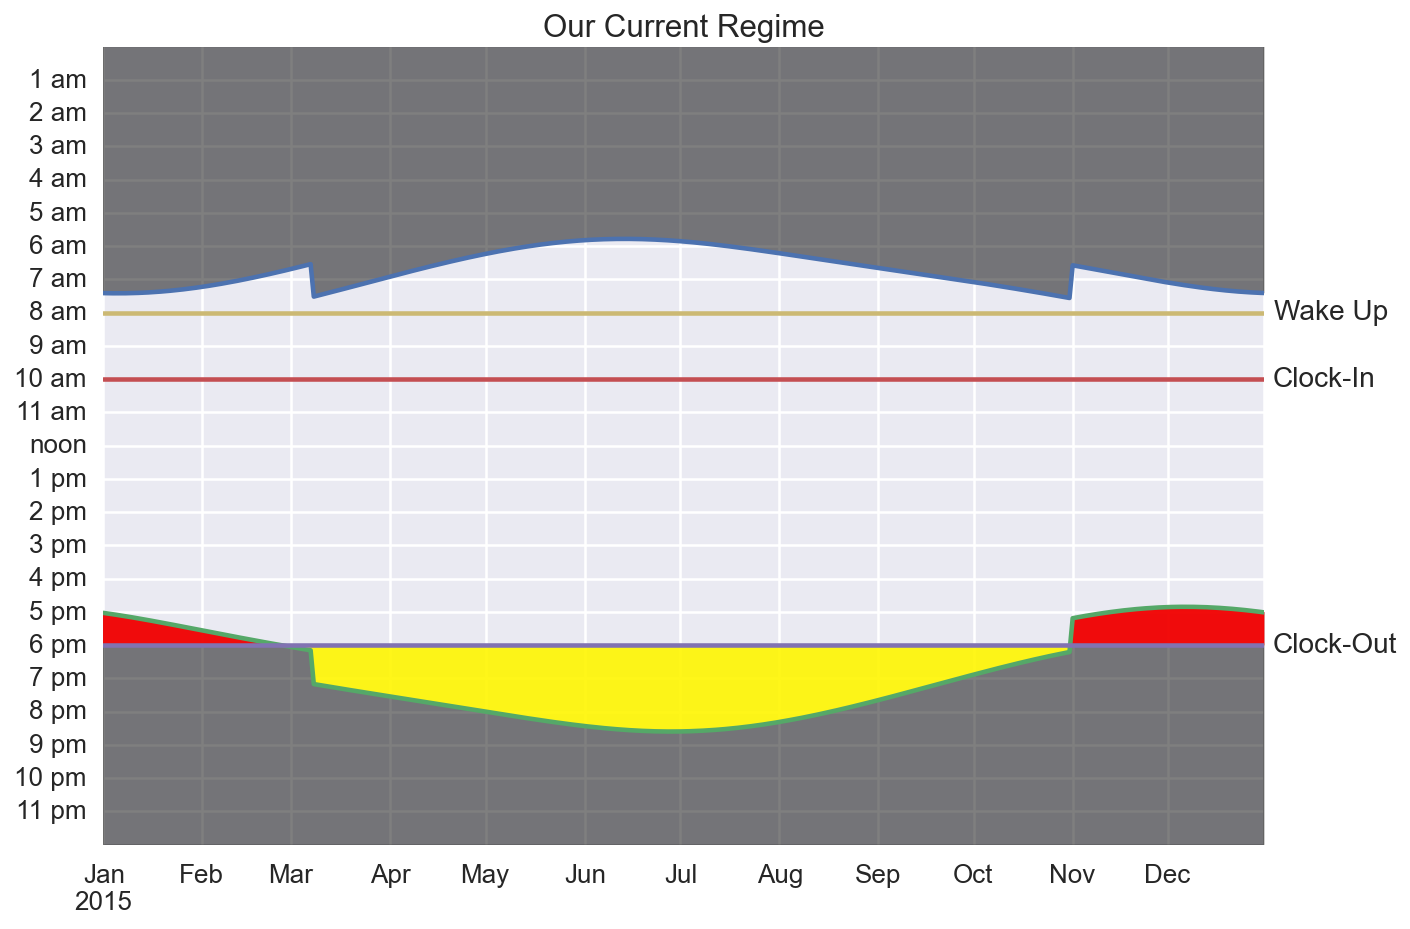

In [54]:
df.rises.apply(dt_to_hour).plot()
df.sets.apply(dt_to_hour).plot()
df.clock_in.apply(dt_to_hour).plot()
df.clock_out.apply(dt_to_hour).plot()
df.wakeups.apply(dt_to_hour).plot()

# Shade night time dark
plt.fill_between(df.index, df.rises.apply(dt_to_hour), 0, color='k', alpha=0.5)
plt.fill_between(df.index, df.sets.apply(dt_to_hour), 24, color='k', alpha=0.5)

# Shade night time during work extra
# Needs to be two separate areas :(
plt.fill_between(df.ix[:100][df.sets < df.clock_out].index, 
                 df.ix[:100][df.sets < df.clock_out].sets.apply(dt_to_hour), 
                 18, color='r', alpha=0.9)

plt.fill_between(df.ix[101:][df.sets < df.clock_out].index, 
                 df.ix[101:][df.sets < df.clock_out].sets.apply(dt_to_hour), 
                 18, color='r', alpha=0.9)

# Shade after work sunshine
plt.fill_between(df[df.sets > df.clock_out].index,
                 df[df.sets > df.clock_out].clock_out.apply(dt_to_hour),
                 df[df.sets > df.clock_out].sets.apply(dt_to_hour),
                 color='#fff600', alpha=0.9)

plt.ylim(0, 24)
plt.gca().invert_yaxis()
plt.yticks(np.arange(1,24), ['1 am', '2 am', '3 am', '4 am', '5 am', '6 am', '7 am', '8 am', '9 am', '10 am', '11 am',
                             'noon', '1 pm', '2 pm', '3 pm', '4 pm', '5 pm', '6 pm', '7 pm', '8 pm', '9 pm', '10 pm',
                             '11 pm'])

plt.text(pd.Timestamp('2016-01-03'), 8, 'Wake Up', fontsize=14, verticalalignment='center')
plt.text(pd.Timestamp('2016-01-03'), 10, 'Clock-In', fontsize=14, verticalalignment='center')
plt.text(pd.Timestamp('2016-01-03'), 18, 'Clock-Out', fontsize=14, verticalalignment='center')

plt.title("Our Current Regime")

# plt.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.3))

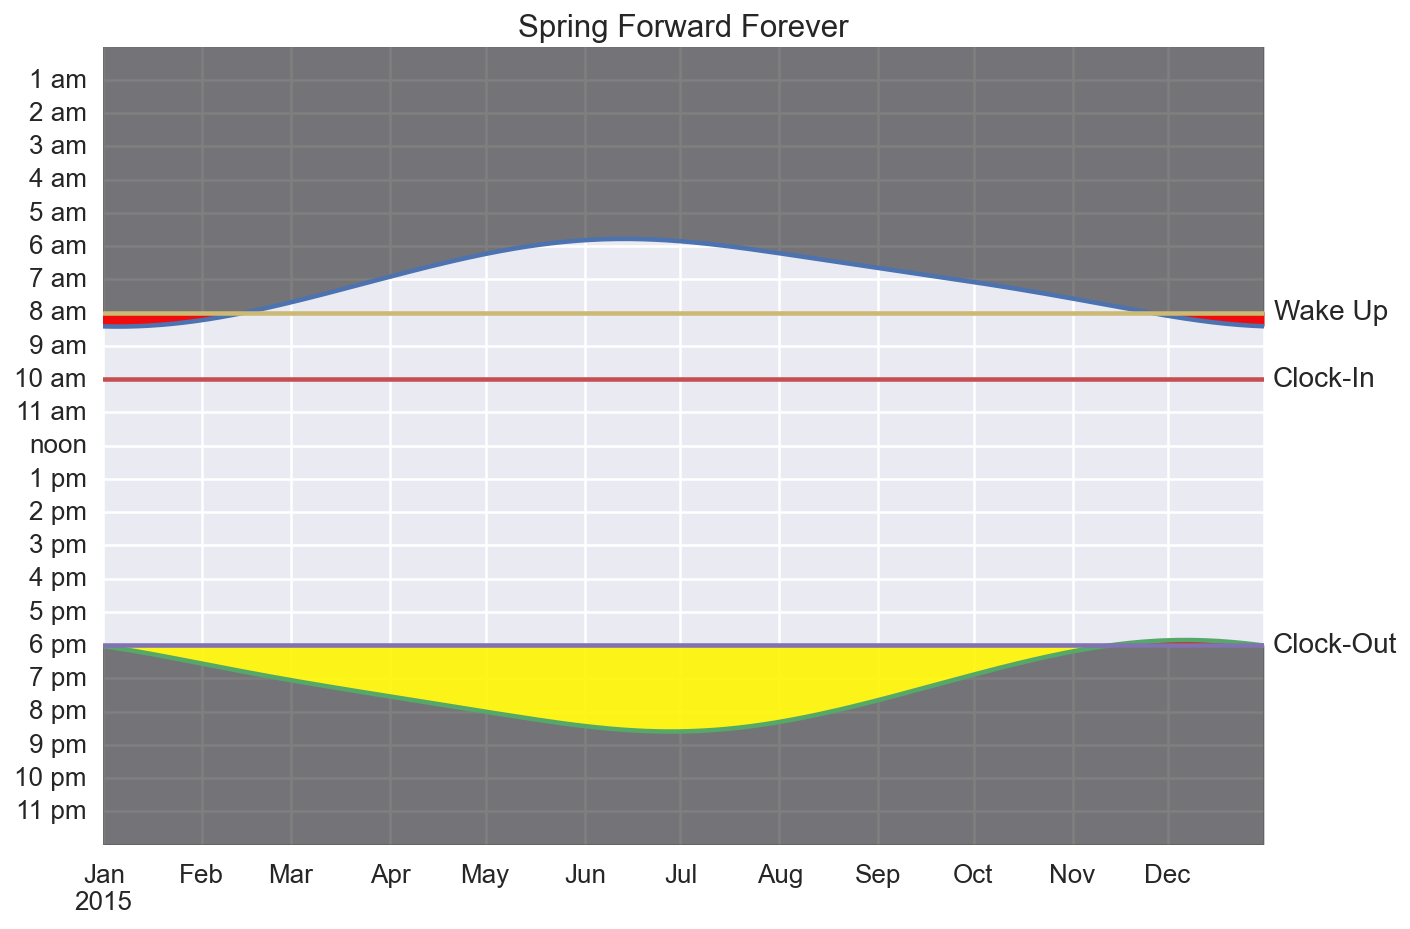

In [49]:
df.dst_rises.apply(dt_to_hour).plot()
df.dst_sets.apply(dt_to_hour).plot()
df.clock_in.apply(dt_to_hour).plot()
df.clock_out.apply(dt_to_hour).plot()
df.wakeups.apply(dt_to_hour).plot()

# Shade night time dark
plt.fill_between(df.index, df.dst_rises.apply(dt_to_hour), 0, color='k', alpha=0.5)
plt.fill_between(df.index, df.dst_sets.apply(dt_to_hour), 24, color='k', alpha=0.5)

# Shade night time during work extra
# Needs to be two separate areas :(
plt.fill_between(df[df.dst_sets < df.clock_out].index, 
                 df[df.dst_sets < df.clock_out].dst_sets.apply(dt_to_hour), 
                 18, color='r', alpha=0.9)

# Shade night time after wake up
plt.fill_between(df[df.dst_rises > df.wakeups].index,
                 df[df.dst_rises > df.wakeups].wakeups.apply(dt_to_hour),
                 df[df.dst_rises > df.wakeups].dst_rises.apply(dt_to_hour),
                 color='r', alpha=0.9)

# Shade after work sunshine
plt.fill_between(df[df.dst_sets > df.clock_out].index,
                 df[df.dst_sets > df.clock_out].clock_out.apply(dt_to_hour),
                 df[df.dst_sets > df.clock_out].dst_sets.apply(dt_to_hour),
                 color='#fff600', alpha=0.9)

plt.ylim(0, 24)
plt.gca().invert_yaxis()
plt.yticks(np.arange(1,24), ['1 am', '2 am', '3 am', '4 am', '5 am', '6 am', '7 am', '8 am', '9 am', '10 am', '11 am',
                             'noon', '1 pm', '2 pm', '3 pm', '4 pm', '5 pm', '6 pm', '7 pm', '8 pm', '9 pm', '10 pm',
                             '11 pm'])

plt.text(pd.Timestamp('2016-01-03'), 8, 'Wake Up', fontsize=14, verticalalignment='center')
plt.text(pd.Timestamp('2016-01-03'), 10, 'Clock-In', fontsize=14, verticalalignment='center')
plt.text(pd.Timestamp('2016-01-03'), 18, 'Clock-Out', fontsize=14, verticalalignment='center')

# plt.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.3))
plt.title("Spring Forward Forever")

In [50]:
df.keys()

Index([u'rises', u'sets', u'wakeups', u'sleeps', u'clock_in', u'clock_out', u'after_work_sun', u'before_work_sun', u'dst_sets', u'after_work_sun_dst', u'dst_rises', u'no_dst_sets', u'no_dst_rises', u'before_work_sun_dst', u'after_work_sun_no_dst', u'before_work_sun_no_dst'], dtype='object')

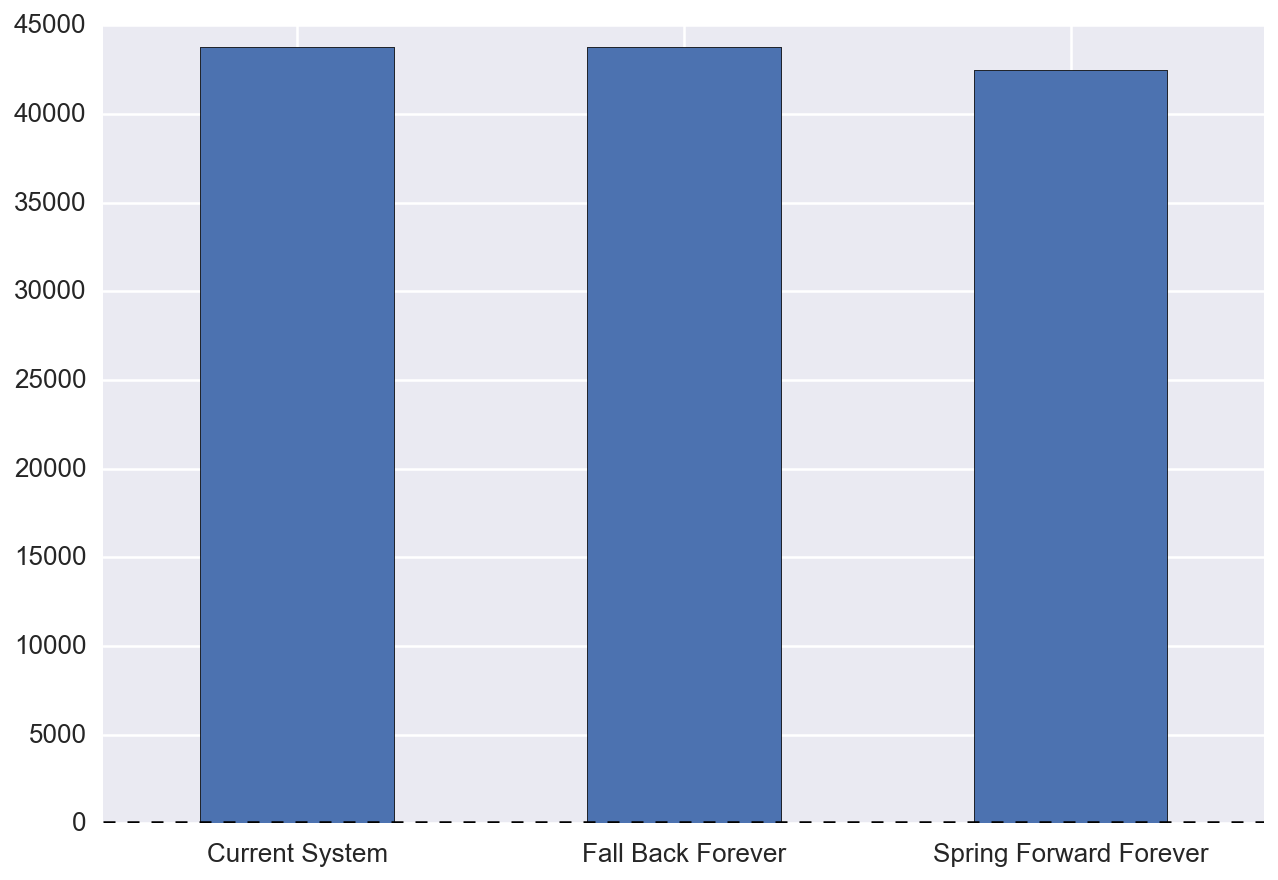

In [51]:
pd.Series([
        df.before_work_sun.sum(), 
        df.before_work_sun_no_dst.sum(), 
        df.before_work_sun_dst.sum()],
         index=['Current System', 'Fall Back Forever', 'Spring Forward Forever']).plot(kind='bar', rot=0)

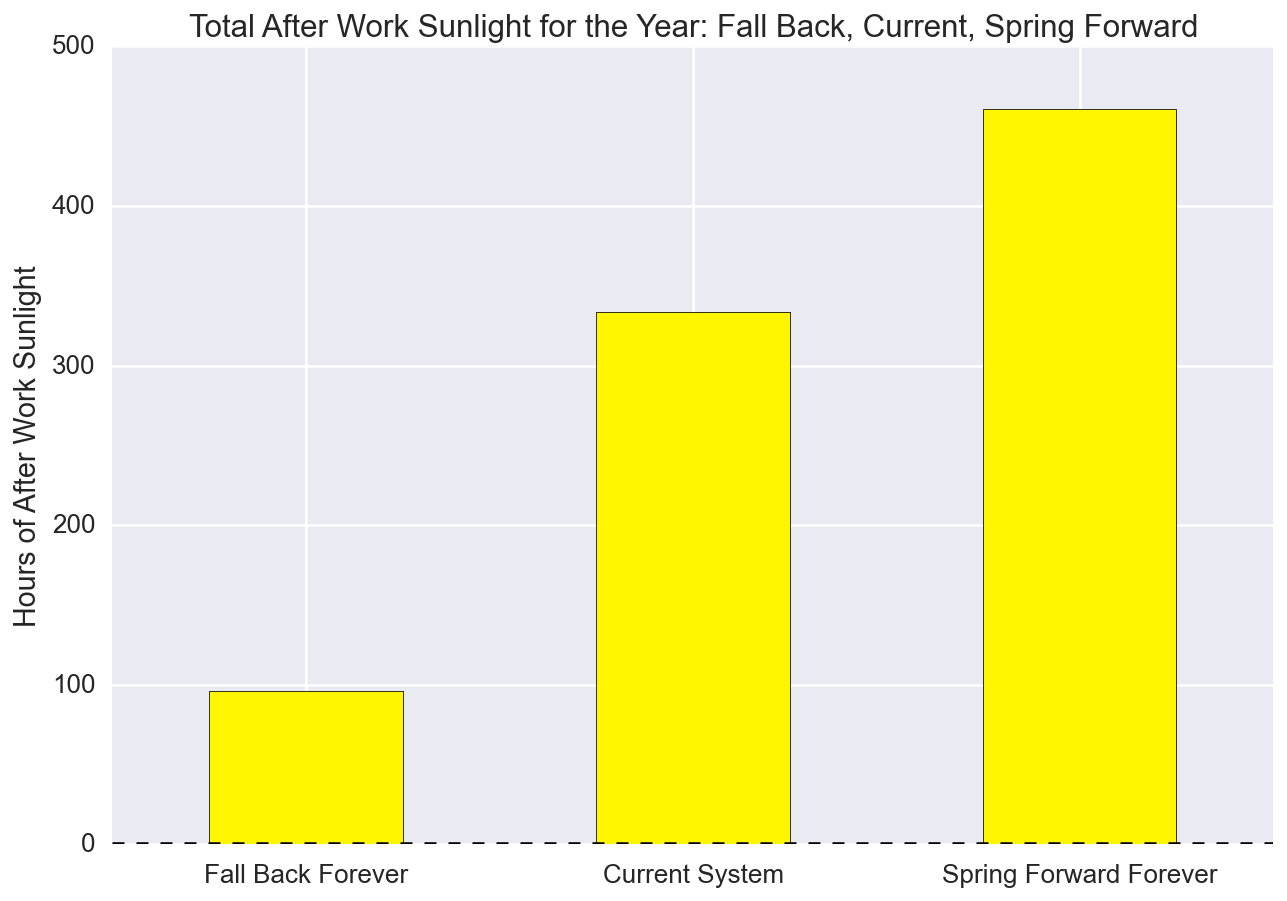

In [52]:
pd.Series([
 
        df.after_work_sun_no_dst.sum() / 60, 
                df.after_work_sun.sum() / 60,
        df.after_work_sun_dst.sum() / 60],
         index=['Fall Back Forever', 'Current System', 'Spring Forward Forever']).plot(kind='bar', rot=0, color='#fff600')
plt.ylabel("Hours of After Work Sunlight")
plt.title("Total After Work Sunlight for the Year: Fall Back, Current, Spring Forward")